### Bayesian Linear Regression P152
#### Dummy data

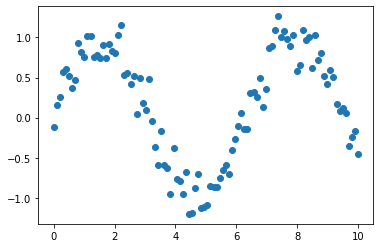

In [92]:
import numpy

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,10,100)
w = np.random.randn(100) * 0.2 # variance 0.2, precision=5
Y = np.sin(X) + w
Y_true = np.sin(X)

plt.scatter(X,Y)
plt.show()

#### Tuning data_num and precision to gain more insight.

current evidence:  -1132.6646580270422


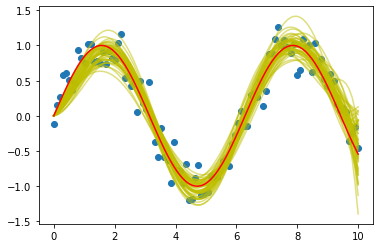

In [106]:
class Bayes_Regression:
    def __init__(self, model_order):
        # random initialization of gaussian prior
        self.feature_dim = model_order
        self.m0 = np.zeros((1, self.feature_dim))
        self.alpha = 0.1
        self.S0 = np.eye(self.feature_dim, self.feature_dim) * self.alpha
        self.precision = 5
        self.beta = 1/self.precision
        
    @staticmethod
    def feature_expansion(X, dim):
        X_e = X.reshape(1, len(X))
        res = X_e
        for n in range(2,dim+1):
            res = np.concatenate((res, X_e**n))
        return res
            
    def learn(self, data, label):
        # data is design matrix
        data_num = max(data.shape)
        self.data_num = data_num
        data = data.reshape(self.feature_dim, data_num)
        self.data = data
        label = label.reshape(data_num,)
        self.label = label
        assert data.shape==(self.feature_dim,data_num)
        assert label.shape == (data_num,)
        self.SN = np.linalg.inv(np.linalg.inv(self.S0) + self.precision*data@data.T)
        self.mN = self.SN@(np.linalg.inv(self.S0)@self.m0.T +\
                           self.precision*np.matmul(data, label).reshape(self.feature_dim,1))
        
    def parameter_sample(self):
        # return a near positive semi-definite covariance matrix
        def get_near_psd(A):
            C = (A + A.T)/2
            eigval, eigvec = np.linalg.eig(C)
            eigval[eigval < 0] = 0

            return eigvec.dot(np.diag(eigval)).dot(eigvec.T)
        self.SN = get_near_psd(self.SN)
        W = np.random.multivariate_normal(np.squeeze(self.mN), self.SN)
        return W
    
    def evidence(self):
        A = np.linalg.inv(self.SN)
        Emn = self.beta/2 * np.linalg.norm(self.label-self.data.T@self.mN)**2 + self.alpha/2 * self.mN.T@self.mN
        log_evidence = self.feature_dim/2*np.log(self.alpha) + self.data_num/2*np.log(self.beta) - \
                        Emn - 1/2*np.log(np.linalg.det(A)) - self.data_num/2*np.log(2*np.pi)
        
        if isinstance(log_evidence, np.ndarray):
            log_evidence = np.squeeze(log_evidence)
        return log_evidence

# random data_num x data points
#data_num = 100
#index = np.random.randint(0,X_feature.shape[1],size=(data_num))
#samples = X_feature[:,index]
#Y_sam = Y[index]

BR = Bayes_Regression(8)
XX = Bayes_Regression.feature_expansion(X, BR.feature_dim)
BR.learn(XX, Y)
print("current evidence: ", BR.evidence())
# 50 times realization
for _ in range(50):
    W = BR.parameter_sample()
    plt.plot(X, np.dot(W, XX), '-y', alpha=0.5)
plt.scatter(X, Y)
plt.plot(X, Y_true, '-r')
plt.show()

### Bayesian Model Selection P167
#### Seems Implementation has problem, but I can't find out

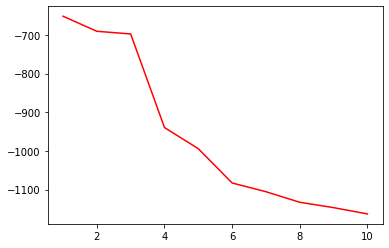

In [113]:
model_order = np.linspace(1,10,10)
evidence = []
for n in model_order:
    BR = Bayes_Regression(int(n))
    XX = Bayes_Regression.feature_expansion(X, BR.feature_dim)
    BR.learn(XX, Y)
    evidence.append(BR.evidence())
plt.plot(model_order, evidence, '-r')
plt.show()